In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import geopandas as gpd
from shapely.geometry import Point

In [4]:
tree_df = pd.read_csv('/app/working/data/la_trees_combined.csv')
# Convert to GeoDataFrame
tree_gdf = gpd.GeoDataFrame(
    tree_df,
    geometry=gpd.points_from_xy(tree_df['Longitude'], tree_df['Latitude']),
    crs="EPSG:4326"
)

la_fire_0_gdf = gpd.read_file("/app/working/data/la_fire_0_gdf.geojson")
la_fire_0_gdf_clipped = gpd.read_file("/app/working/data/la_fire_0_gdf_clipped.geojson")

In [22]:
tree_gdf = tree_gdf.to_crs("EPSG:3857")
la_fire_0_gdf = la_fire_0_gdf.to_crs("EPSG:3857")
la_fire_0_gdf_clipped = la_fire_0_gdf_clipped.to_crs("EPSG:3857")

In [6]:
la_fire_0_gdf.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'IRWINID', 'FIRE_NUM',
       'COMPLEX_ID', 'DECADES', 'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [ ]:
# Trees within 500m of any LA fire (full boundary)
tree_near_fire = gpd.sjoin_nearest(
    tree_gdf, la_fire_0_gdf,
    how="inner",
    max_distance=500,
    distance_col="distance_m"
)

In [37]:
# Trees within 500m of strictly clipped LA fires
tree_near_clipped_fire_500 = gpd.sjoin_nearest(
    tree_gdf, la_fire_0_gdf_clipped,
    how="inner",
    max_distance=500,
    distance_col="distance_m"
)

In [38]:
# Trees within 50m of strictly clipped LA fires
tree_near_clipped_fire_50 = gpd.sjoin_nearest(
    tree_gdf, la_fire_0_gdf_clipped,
    how="inner",
    max_distance=50,
    distance_col="distance_m"
)

In [41]:
# Save to GeoJSON
tree_near_clipped_fire_500.to_file("tree_near_clipped_fire_500.geojson", driver="GeoJSON")
tree_near_clipped_fire_50.to_file("tree_near_clipped_fire_50.geojson", driver="GeoJSON")

In [34]:
la_boundary = gpd.read_file('/app/working/data/la_city_boundary.geojson')
la_boundary = la_boundary.to_crs(epsg=4326)

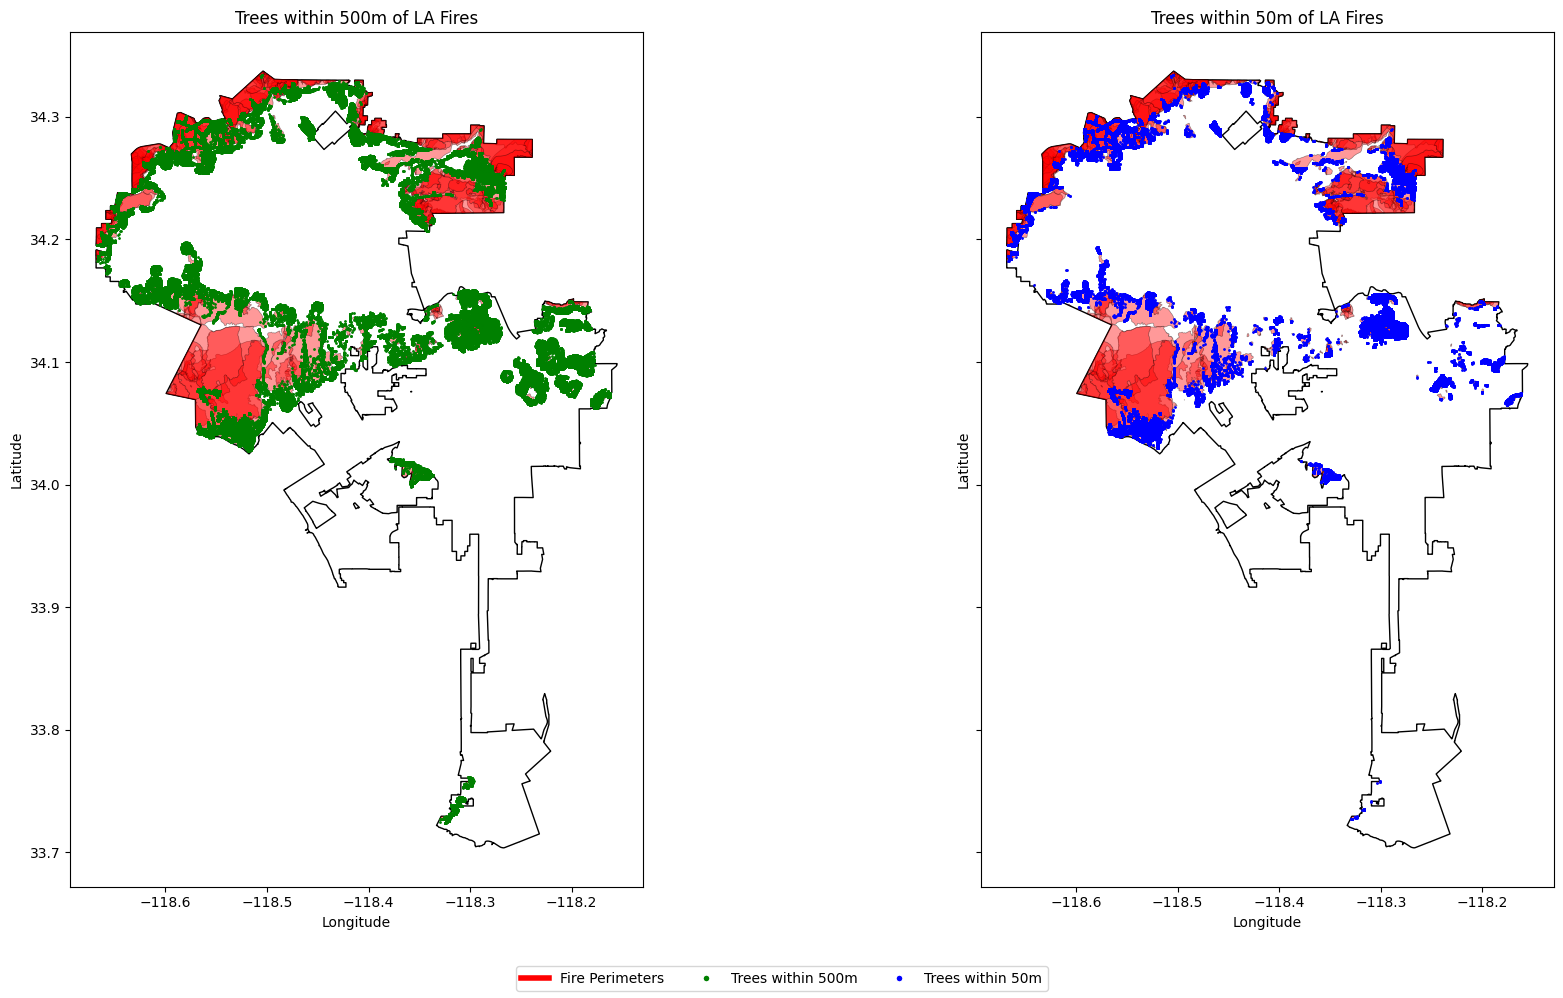

In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Reproject all to EPSG:4326 for plotting
la_boundary_plot = la_boundary.to_crs(epsg=4326)
la_fire_0_gdf_clipped_plot = la_fire_0_gdf_clipped.to_crs(epsg=4326)
tree_near_clipped_fire_plot_500 = tree_near_clipped_fire_500.to_crs(epsg=4326)
tree_near_clipped_fire_plot_50 = tree_near_clipped_fire_50.to_crs(epsg=4326)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# --- Plot 1: 500m ---
la_boundary_plot.plot(ax=axes[0], color='none', edgecolor='black')
la_fire_0_gdf_clipped_plot.plot(ax=axes[0], color='red', alpha=0.4, edgecolor='black', linewidth=0.5)
tree_near_clipped_fire_plot_500.plot(ax=axes[0], color='green', markersize=1)

axes[0].set_title("Trees within 500m of LA Fires")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# --- Plot 2: 50m ---
la_boundary_plot.plot(ax=axes[1], color='none', edgecolor='black')
la_fire_0_gdf_clipped_plot.plot(ax=axes[1], color='red', alpha=0.4, edgecolor='black', linewidth=0.5)
tree_near_clipped_fire_plot_50.plot(ax=axes[1], color='blue', markersize=1)

axes[1].set_title("Trees within 50m of LA Fires")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# --- Shared Legend ---
custom_lines = [
    Line2D([0], [0], color='red', lw=4, label='Fire Perimeters'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='Trees within 500m'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Trees within 50m')
]
fig.legend(handles=custom_lines, loc='lower center', ncol=3)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space for legend
plt.show()
